In [195]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
import numpy as np
import pickle

import xgboost as xgb
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV 

In [88]:
weather = pd.read_csv("West Nile/weather.csv")

In [89]:
print(weather.head(20))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1  2007-05-01    83    50   67     14        51      56    0    2   
1         2  2007-05-01    84    52   68      M        51      57    0    3   
2         1  2007-05-02    59    42   51     -3        42      47   14    0   
3         2  2007-05-02    60    43   52      M        42      47   13    0   
4         1  2007-05-03    66    46   56      2        40      48    9    0   
5         2  2007-05-03    67    48   58      M        40      50    7    0   
6         1  2007-05-04    66    49   58      4        41      50    7    0   
7         2  2007-05-04    78    51    M      M        42      50    M    M   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
9         2  2007-05-05    66    54   60      M        39      50    5    0   
10        1  2007-05-06    68    49   59      4        30      46    6    0   
11        2  2007-05-06    68    52   60      M     

In [90]:
#Change non-number strings into number strings in PrecipTotal

mask = ((weather['PrecipTotal'] == '  T') | (weather['PrecipTotal'] == 'M'))
weather.loc[mask,'PrecipTotal'] = np.nan

In [91]:
print(weather.head(10))

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   
5        2  2007-05-03    67    48   58      M        40      50    7    0   
6        1  2007-05-04    66    49   58      4        41      50    7    0   
7        2  2007-05-04    78    51    M      M        42      50    M    M   
8        1  2007-05-05    66    53   60      5        38      49    5    0   
9        2  2007-05-05    66    54   60      M        39      50    5    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.

In [92]:
#check whether there's other non-float data in PrecipTotal

uniqueRain = set(weather['PrecipTotal'])
print(uniqueRain)

{nan, '0.62', '1.44', '0.77', '0.08', '1.25', '0.12', '0.42', '0.85', '2.06', '1.90', '0.58', '3.64', '0.74', '2.76', '0.41', '0.71', '0.06', '0.81', '1.18', '0.63', '2.20', '0.40', '0.07', '0.97', '1.02', '0.59', '0.82', '0.38', '0.23', '0.68', '0.61', '1.04', '0.21', '1.31', '0.22', '0.05', '0.52', '3.97', '0.17', '2.09', '1.82', '3.07', '0.48', '0.90', '1.75', '0.46', '1.46', '0.78', '3.15', '1.38', '0.25', '3.66', '0.87', '1.29', '3.31', '0.09', '1.01', '0.80', '2.90', '1.06', '1.28', '1.30', '0.44', '0.72', '1.33', '0.60', '0.36', '0.65', '1.16', '0.27', '0.20', '0.56', '0.69', '0.11', '0.04', '1.60', '1.05', '0.45', '0.84', '0.24', '0.34', '0.16', '1.03', '1.48', '0.55', '2.68', '3.17', '0.43', '1.19', '6.64', '1.11', '0.39', '0.32', '0.96', '1.21', '0.93', '1.96', '0.19', '0.10', '1.09', '0.00', '2.24', '0.31', '1.15', '4.73', '0.88', '1.88', '1.43', '0.66', '1.26', '0.18', '0.76', '0.79', '0.54', '0.14', '1.73', '1.58', '0.01', '0.89', '1.14', '1.35', '2.35', '0.02', '0.47', '2

In [93]:
#convert all the data in PrecipTotal from string to float

weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)

In [94]:
print(weather.head(10))

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   
5        2  2007-05-03    67    48   58      M        40      50    7    0   
6        1  2007-05-04    66    49   58      4        41      50    7    0   
7        2  2007-05-04    78    51    M      M        42      50    M    M   
8        1  2007-05-05    66    53   60      5        38      49    5    0   
9        2  2007-05-05    66    54   60      M        39      50    5    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  SeaLevel  \
0    ...                0      M      0.0         0.0       29

In [95]:
#check the possible values for SnowFall

uniqueSnow = set(weather['SnowFall'])
print(uniqueSnow)

{'  T', '0.0', 'M', '0.1'}


In [96]:
#check the possible values for Water1

uniqueWater = set(weather['Water1'])
print(uniqueWater)

{'M'}


In [97]:
#check the possible values for Depth

uniqueDepth = set(weather['Depth'])
print(uniqueDepth)

{'0', 'M'}


In [98]:
#Dropping the unnecessary columns

weather.drop("CodeSum", axis = 1, inplace = True)
weather.drop("Depth", axis = 1, inplace = True)
weather.drop("SnowFall", axis = 1, inplace = True)
weather.drop("Water1", axis = 1, inplace = True)


In [99]:
print(weather.head(10))

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   
5        2  2007-05-03    67    48   58      M        40      50    7    0   
6        1  2007-05-04    66    49   58      4        41      50    7    0   
7        2  2007-05-04    78    51    M      M        42      50    M    M   
8        1  2007-05-05    66    53   60      5        38      49    5    0   
9        2  2007-05-05    66    54   60      M        39      50    5    0   

  Sunrise Sunset  PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir  \
0    0448   1849          0.0       29.10    29.82          1.7

In [100]:
uniqueSunrise = set(weather['Sunrise'])
print(uniqueSunrise)

{'0522', '0419', '0541', '0510', '0450', '0606', '0549', '0539', '0432', '0524', '0612', '0416', '0439', '0458', '0605', '0517', '0440', '0547', '0613', '0542', '0553', '0423', '0530', '0556', '0433', '0421', '0622', '0456', '0429', '0454', '0614', '0500', '0436', '0446', '0540', '0600', '0420', '0529', '0455', '0448', '0555', '0428', '0535', '0511', '0435', '0424', '0443', '0558', '0559', '0418', '0457', '0512', '0548', '0538', '0616', '0506', '0544', '0528', '0441', '0617', '0425', '0611', '0523', '0504', '0516', '0514', '0604', '0427', '0602', '0532', '0521', '0525', '0552', '0447', '0502', '0513', '0437', '0444', '0434', '0536', '0505', '0619', '0445', '0518', '0554', '0603', '0623', '0620', '0527', '0610', '0550', '0531', '-', '0508', '0417', '0520', '0426', '0557', '0438', '0452', '0509', '0501', '0607', '0503', '0545', '0453', '0451', '0449', '0526', '0543', '0537', '0442', '0533', '0422', '0459', '0430', '0431', '0618', '0546', '0515', '0608', '0519'}


In [101]:
uniqueSunset = set(weather['Sunset'])
print(uniqueSunset)

{'1924', '1860', '1931', '1856', '1658', '1826', '1851', '1807', '1654', '1712', '1744', '1906', '1756', '1839', '1755', '1803', '1845', '1858', '1812', '1832', '1651', '1709', '1854', '1707', '1725', '1904', '1829', '1908', '1821', '1737', '1915', '1857', '1901', '1819', '1730', '1835', '1859', '1729', '1920', '1902', '1809', '1814', '1741', '1647', '1917', '1824', '1911', '1701', '1849', '1649', '1660', '1831', '1714', '1748', '1749', '1909', '1927', '1739', '1704', '1827', '1912', '1905', '1930', '1923', '1913', '1742', '1916', '1815', '1703', '1706', '1840', '1653', '1650', '1717', '1822', '1850', '1656', '1720', '1919', '1852', '1715', '1914', '1846', '1746', '1837', '-', '1907', '1719', '1657', '1751', '1928', '1735', '1921', '1810', '1903', '1724', '1926', '1918', '1925', '1711', '1817', '1727', '1910', '1734', '1848', '1929', '1855', '1853', '1805', '1842', '1900', '1732', '1843', '1722', '1834', '1753', '1758', '1922', '1760'}


In [102]:
#Dropping more columns

weather.drop("Sunrise", axis = 1, inplace = True)
weather.drop("Sunset", axis = 1, inplace = True)

In [103]:
print(weather.head(10))

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   
5        2  2007-05-03    67    48   58      M        40      50    7    0   
6        1  2007-05-04    66    49   58      4        41      50    7    0   
7        2  2007-05-04    78    51    M      M        42      50    M    M   
8        1  2007-05-05    66    53   60      5        38      49    5    0   
9        2  2007-05-05    66    54   60      M        39      50    5    0   

   PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.0       29.10    29.82          1.7         27      9.2  

In [104]:
mask = ((weather['Station'] == 1))
plusle = weather.loc[mask].copy()

In [105]:
print(plusle.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1  2007-05-01    83    50   67     14        51      56    0    2   
2         1  2007-05-02    59    42   51     -3        42      47   14    0   
4         1  2007-05-03    66    46   56      2        40      48    9    0   
6         1  2007-05-04    66    49   58      4        41      50    7    0   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
10        1  2007-05-06    68    49   59      4        30      46    6    0   
12        1  2007-05-07    83    47   65     10        41      54    0    0   
14        1  2007-05-08    82    54   68     12        58      62    0    3   
16        1  2007-05-09    77    61   69     13        59      63    0    4   
18        1  2007-05-10    84    56   70     14        52      60    0    5   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.00       29.10    29.82          1.7         

In [106]:
mask = ((weather['Station'] == 2))
minun = weather.loc[mask].copy()

In [107]:
print(minun.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
1         2  2007-05-01    84    52   68      M        51      57    0    3   
3         2  2007-05-02    60    43   52      M        42      47   13    0   
5         2  2007-05-03    67    48   58      M        40      50    7    0   
7         2  2007-05-04    78    51    M      M        42      50    M    M   
9         2  2007-05-05    66    54   60      M        39      50    5    0   
11        2  2007-05-06    68    52   60      M        30      46    5    0   
13        2  2007-05-07    84    50   67      M        39      53    0    2   
15        2  2007-05-08    80    60   70      M        57      63    0    5   
17        2  2007-05-09    76    63   70      M        60      63    0    5   
19        2  2007-05-10    83    59   71      M        52      61    0    6   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
1          0.00       29.18    29.82          2.7         

In [108]:
minun['Depart'] = plusle['Depart'].values

In [109]:
print(minun.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
1         2  2007-05-01    84    52   68     14        51      57    0    3   
3         2  2007-05-02    60    43   52     -3        42      47   13    0   
5         2  2007-05-03    67    48   58      2        40      50    7    0   
7         2  2007-05-04    78    51    M      4        42      50    M    M   
9         2  2007-05-05    66    54   60      5        39      50    5    0   
11        2  2007-05-06    68    52   60      4        30      46    5    0   
13        2  2007-05-07    84    50   67     10        39      53    0    2   
15        2  2007-05-08    80    60   70     12        57      63    0    5   
17        2  2007-05-09    76    63   70     13        60      63    0    5   
19        2  2007-05-10    83    59   71     14        52      61    0    6   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
1          0.00       29.18    29.82          2.7         

In [110]:
mask = (minun['Tavg'] == 'M')
minun.loc[mask,'Tavg'] = np.nan

In [111]:
uniqueTavg = set(minun['Tavg'])
print(uniqueTavg)

{nan, '52', '61', '42', '82', '41', '94', '86', '56', '80', '65', '91', '60', '79', '70', '69', '53', '85', '47', '64', '92', '57', '78', '66', '62', '59', '67', '43', '89', '75', '55', '87', '73', '46', '50', '36', '37', '76', '49', '77', '81', '90', '45', '68', '58', '84', '51', '72', '88', '40', '71', '63', '44', '54', '83', '48', '74', '39'}


In [112]:
fillna_table = plusle.copy()

In [113]:
minun = minun.fillna(fillna_table)

In [114]:
minun = minun.set_index(plusle.index)

In [115]:
minun['Tavg'] = round(((minun['Tmax'] + minun['Tmin'])/2), 0)

In [116]:
print(minun.head(10))

    Station        Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0         2  2007-05-01    84    52  68.0     14        51      57    0    3   
2         2  2007-05-02    60    43  52.0     -3        42      47   13    0   
4         2  2007-05-03    67    48  58.0      2        40      50    7    0   
6         2  2007-05-04    78    51  64.0      4        42      50    M    M   
8         2  2007-05-05    66    54  60.0      5        39      50    5    0   
10        2  2007-05-06    68    52  60.0      4        30      46    5    0   
12        2  2007-05-07    84    50  67.0     10        39      53    0    2   
14        2  2007-05-08    80    60  70.0     12        57      63    0    5   
16        2  2007-05-09    76    63  70.0     13        60      63    0    5   
18        2  2007-05-10    83    59  71.0     14        52      61    0    6   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.00       29.18    29.82          2

In [117]:
mask = (minun['Heat'] == 'M')
minun.loc[mask,'Heat'] = np.nan

In [118]:
mask = (minun['Cool'] == 'M')
minun.loc[mask,'Cool'] = np.nan

In [119]:
print(minun.head(10))

    Station        Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0         2  2007-05-01    84    52  68.0     14        51      57    0    3   
2         2  2007-05-02    60    43  52.0     -3        42      47   13    0   
4         2  2007-05-03    67    48  58.0      2        40      50    7    0   
6         2  2007-05-04    78    51  64.0      4        42      50  NaN  NaN   
8         2  2007-05-05    66    54  60.0      5        39      50    5    0   
10        2  2007-05-06    68    52  60.0      4        30      46    5    0   
12        2  2007-05-07    84    50  67.0     10        39      53    0    2   
14        2  2007-05-08    80    60  70.0     12        57      63    0    5   
16        2  2007-05-09    76    63  70.0     13        60      63    0    5   
18        2  2007-05-10    83    59  71.0     14        52      61    0    6   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.00       29.18    29.82          2

In [120]:
minun = minun.fillna(fillna_table)

In [121]:
print(minun.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         2  2007-05-01    84    52   68     14        51      57    0    3   
2         2  2007-05-02    60    43   52     -3        42      47   13    0   
4         2  2007-05-03    67    48   58      2        40      50    7    0   
6         2  2007-05-04    78    51   64      4        42      50    7    0   
8         2  2007-05-05    66    54   60      5        39      50    5    0   
10        2  2007-05-06    68    52   60      4        30      46    5    0   
12        2  2007-05-07    84    50   67     10        39      53    0    2   
14        2  2007-05-08    80    60   70     12        57      63    0    5   
16        2  2007-05-09    76    63   70     13        60      63    0    5   
18        2  2007-05-10    83    59   71     14        52      61    0    6   

   PrecipTotal StnPressure SeaLevel ResultSpeed  ResultDir AvgSpeed  
0            0       29.18    29.82         2.7         25  

In [122]:
fillna_table2 = minun.copy()
plusle = plusle.fillna(fillna_table2)

In [123]:
print(plusle.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1  2007-05-01    83    50   67     14        51      56    0    2   
2         1  2007-05-02    59    42   51     -3        42      47   14    0   
4         1  2007-05-03    66    46   56      2        40      48    9    0   
6         1  2007-05-04    66    49   58      4        41      50    7    0   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
10        1  2007-05-06    68    49   59      4        30      46    6    0   
12        1  2007-05-07    83    47   65     10        41      54    0    0   
14        1  2007-05-08    82    54   68     12        58      62    0    3   
16        1  2007-05-09    77    61   69     13        59      63    0    4   
18        1  2007-05-10    84    56   70     14        52      60    0    5   

   PrecipTotal StnPressure SeaLevel ResultSpeed  ResultDir AvgSpeed  
0            0       29.10    29.82         1.7         27  

In [124]:
minun = minun.fillna(0)
plusle = plusle.fillna(0)

In [125]:
print(minun.head(10))

    Station        Date  Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  \
0         2  2007-05-01    84    52  68.0     14        51      57    0    3   
2         2  2007-05-02    60    43  52.0     -3        42      47   13    0   
4         2  2007-05-03    67    48  58.0      2        40      50    7    0   
6         2  2007-05-04    78    51  64.0      4        42      50    7    0   
8         2  2007-05-05    66    54  60.0      5        39      50    5    0   
10        2  2007-05-06    68    52  60.0      4        30      46    5    0   
12        2  2007-05-07    84    50  67.0     10        39      53    0    2   
14        2  2007-05-08    80    60  70.0     12        57      63    0    5   
16        2  2007-05-09    76    63  70.0     13        60      63    0    5   
18        2  2007-05-10    83    59  71.0     14        52      61    0    6   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.00       29.18    29.82          2

In [126]:
print(plusle.head(10))

    Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1  2007-05-01    83    50   67     14        51      56    0    2   
2         1  2007-05-02    59    42   51     -3        42      47   14    0   
4         1  2007-05-03    66    46   56      2        40      48    9    0   
6         1  2007-05-04    66    49   58      4        41      50    7    0   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
10        1  2007-05-06    68    49   59      4        30      46    6    0   
12        1  2007-05-07    83    47   65     10        41      54    0    0   
14        1  2007-05-08    82    54   68     12        58      62    0    3   
16        1  2007-05-09    77    61   69     13        59      63    0    4   
18        1  2007-05-10    84    56   70     14        52      60    0    5   

    PrecipTotal StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0          0.00       29.10    29.82          1.7         

In [127]:
pluslepure = plusle.drop(['Station', 'Date'], axis = 1)
minunpure = minun.drop(['Station', 'Date'], axis = 1)

In [128]:
print(pluslepure.head(10))

    Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  PrecipTotal  \
0     83    50   67     14        51      56    0    2         0.00   
2     59    42   51     -3        42      47   14    0         0.00   
4     66    46   56      2        40      48    9    0         0.00   
6     66    49   58      4        41      50    7    0         0.00   
8     66    53   60      5        38      49    5    0         0.00   
10    68    49   59      4        30      46    6    0         0.00   
12    83    47   65     10        41      54    0    0         0.00   
14    82    54   68     12        58      62    0    3         0.00   
16    77    61   69     13        59      63    0    4         0.13   
18    84    56   70     14        52      60    0    5         0.00   

   StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0        29.10    29.82          1.7         27      9.2  
2        29.38    30.09         13.0          4     13.4  
4        29.39    30.12         11.7     

In [129]:
print(minunpure.head(10))

    Tmax  Tmin  Tavg Depart  DewPoint WetBulb Heat Cool  PrecipTotal  \
0     84    52  68.0     14        51      57    0    3         0.00   
2     60    43  52.0     -3        42      47   13    0         0.00   
4     67    48  58.0      2        40      50    7    0         0.00   
6     78    51  64.0      4        42      50    7    0         0.00   
8     66    54  60.0      5        39      50    5    0         0.00   
10    68    52  60.0      4        30      46    5    0         0.00   
12    84    50  67.0     10        39      53    0    2         0.00   
14    80    60  70.0     12        57      63    0    5         0.00   
16    76    63  70.0     13        60      63    0    5         0.02   
18    83    59  71.0     14        52      61    0    6         0.00   

   StnPressure SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0        29.18    29.82          2.7         25      9.6  
2        29.44    30.08         13.3          2     13.4  
4        29.46    30.12       

In [130]:
minunpure = minunpure.set_index(pluslepure.index)

In [131]:
mask = (minunpure['WetBulb'] == 'M')
minunpure.loc[mask,'WetBulb'] = np.nan

mask = (minunpure['StnPressure'] == 'M')
minunpure.loc[mask,'StnPressure'] = np.nan

mask = (minunpure['SeaLevel'] == 'M')
minunpure.loc[mask,'SeaLevel'] = np.nan

mask = (minunpure['AvgSpeed'] == 'M')
minunpure.loc[mask,'AvgSpeed'] = np.nan

In [132]:
mask = (pluslepure['WetBulb'] == 'M')
pluslepure.loc[mask,'WetBulb'] = np.nan

mask = (pluslepure['StnPressure'] == 'M')
pluslepure.loc[mask,'StnPressure'] = np.nan

mask = (pluslepure['SeaLevel'] == 'M')
pluslepure.loc[mask,'SeaLevel'] = np.nan

In [133]:
fillna_tablepp = pluslepure.copy()
fillna_tablemp = minunpure.copy()

minunpure = minunpure.fillna(fillna_tablepp)
pluslepure = pluslepure.fillna(fillna_tablemp)

In [134]:
minunpure['Tmax'] = minunpure['Tmax'].apply(float)
minunpure['Tmin'] = minunpure['Tmin'].apply(float)
minunpure['Tavg'] = minunpure['Tavg'].apply(float)
minunpure['Depart'] = minunpure['Depart'].apply(float)
minunpure['DewPoint'] = minunpure['DewPoint'].apply(float)
minunpure['WetBulb'] = minunpure['WetBulb'].apply(float)
minunpure['Heat'] = minunpure['Heat'].apply(float)
minunpure['Cool'] = minunpure['Cool'].apply(float)
minunpure['PrecipTotal'] = minunpure['PrecipTotal'].apply(float)
minunpure['StnPressure'] = minunpure['StnPressure'].apply(float)
minunpure['SeaLevel'] = minunpure['SeaLevel'].apply(float)
minunpure['ResultSpeed'] = minunpure['ResultSpeed'].apply(float)
minunpure['ResultDir'] = minunpure['ResultDir'].apply(float)
minunpure['AvgSpeed'] = minunpure['AvgSpeed'].apply(float)

In [135]:
pluslepure['Tmax'] = pluslepure['Tmax'].apply(float)
pluslepure['Tmin'] = pluslepure['Tmin'].apply(float)
pluslepure['Tavg'] = pluslepure['Tavg'].apply(float)
pluslepure['Depart'] = pluslepure['Depart'].apply(float)
pluslepure['DewPoint'] = pluslepure['DewPoint'].apply(float)
pluslepure['WetBulb'] = pluslepure['WetBulb'].apply(float)
pluslepure['Heat'] = pluslepure['Heat'].apply(float)
pluslepure['Cool'] = pluslepure['Cool'].apply(float)
pluslepure['PrecipTotal'] = pluslepure['PrecipTotal'].apply(float)
pluslepure['StnPressure'] = pluslepure['StnPressure'].apply(float)
pluslepure['SeaLevel'] = pluslepure['SeaLevel'].apply(float)
pluslepure['ResultSpeed'] = pluslepure['ResultSpeed'].apply(float)
pluslepure['ResultDir'] = pluslepure['ResultDir'].apply(float)
pluslepure['AvgSpeed'] = pluslepure['AvgSpeed'].apply(float)

In [136]:
print(minunpure.describe())

              Tmax         Tmin         Tavg       Depart     DewPoint  \
count  1472.000000  1472.000000  1472.000000  1472.000000  1472.000000   
mean     76.353261    58.889946    67.618886     1.954484    53.538043   
std      11.421482    10.306855    10.535854     6.841110    10.683121   
min      41.000000    29.000000    36.000000   -17.000000    23.000000   
25%      69.000000    51.000000    60.000000    -3.000000    46.000000   
50%      78.000000    60.000000    70.000000     2.000000    55.000000   
75%      85.000000    67.000000    76.000000     7.000000    62.000000   
max     104.000000    83.000000    94.000000    23.000000    74.000000   

           WetBulb         Heat         Cool  PrecipTotal  StnPressure  \
count  1472.000000  1472.000000  1472.000000  1472.000000  1471.000000   
mean     59.591033     3.204484     6.044837     0.132283    29.314684   
std       9.244169     5.765144     6.279738     0.364783     0.155126   
min      33.000000     0.000000     0

In [137]:
print(pluslepure.describe())

             Tmax         Tmin         Tavg       Depart     DewPoint  \
count  1472.00000  1472.000000  1472.000000  1472.000000  1472.000000   
mean     75.97894    56.730978    66.606658     1.954484    53.377717   
std      11.50315    10.347907    10.511437     6.841110    10.670263   
min      42.00000    29.000000    36.000000   -17.000000    22.000000   
25%      68.00000    49.000000    60.000000    -3.000000    46.000000   
50%      78.00000    58.000000    68.000000     2.000000    54.000000   
75%      85.00000    65.000000    75.000000     7.000000    61.250000   
max     103.00000    82.000000    93.000000    23.000000    75.000000   

           WetBulb         Heat         Cool  PrecipTotal  StnPressure  \
count  1472.000000  1472.000000  1472.000000  1472.000000  1471.000000   
mean     59.047554     3.631114     5.237772     0.136311    29.254167   
std       9.317960     6.133829     5.899382     0.420933     0.156100   
min      32.000000     0.000000     0.000000  

In [138]:
minunpure['StnPressure'] = minunpure['StnPressure'].fillna(29.3146838885)

In [139]:
print(pluslepure.head(10))

    Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  PrecipTotal  \
0   83.0  50.0  67.0    14.0      51.0     56.0   0.0   2.0         0.00   
2   59.0  42.0  51.0    -3.0      42.0     47.0  14.0   0.0         0.00   
4   66.0  46.0  56.0     2.0      40.0     48.0   9.0   0.0         0.00   
6   66.0  49.0  58.0     4.0      41.0     50.0   7.0   0.0         0.00   
8   66.0  53.0  60.0     5.0      38.0     49.0   5.0   0.0         0.00   
10  68.0  49.0  59.0     4.0      30.0     46.0   6.0   0.0         0.00   
12  83.0  47.0  65.0    10.0      41.0     54.0   0.0   0.0         0.00   
14  82.0  54.0  68.0    12.0      58.0     62.0   0.0   3.0         0.00   
16  77.0  61.0  69.0    13.0      59.0     63.0   0.0   4.0         0.13   
18  84.0  56.0  70.0    14.0      52.0     60.0   0.0   5.0         0.00   

    StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0         29.10     29.82          1.7       27.0       9.2  
2         29.38     30.09         13.0 

In [140]:
print(minunpure.head(10))

    Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  PrecipTotal  \
0   84.0  52.0  68.0    14.0      51.0     57.0   0.0   3.0         0.00   
2   60.0  43.0  52.0    -3.0      42.0     47.0  13.0   0.0         0.00   
4   67.0  48.0  58.0     2.0      40.0     50.0   7.0   0.0         0.00   
6   78.0  51.0  64.0     4.0      42.0     50.0   7.0   0.0         0.00   
8   66.0  54.0  60.0     5.0      39.0     50.0   5.0   0.0         0.00   
10  68.0  52.0  60.0     4.0      30.0     46.0   5.0   0.0         0.00   
12  84.0  50.0  67.0    10.0      39.0     53.0   0.0   2.0         0.00   
14  80.0  60.0  70.0    12.0      57.0     63.0   0.0   5.0         0.00   
16  76.0  63.0  70.0    13.0      60.0     63.0   0.0   5.0         0.02   
18  83.0  59.0  71.0    14.0      52.0     61.0   0.0   6.0         0.00   

    StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0         29.18     29.82          2.7       25.0       9.6  
2         29.44     30.08         13.3 

In [141]:
pikachu = (minunpure + pluslepure)/2

In [142]:
print(pikachu.head(10))

    Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  PrecipTotal  \
0   83.5  51.0  67.5    14.0      51.0     56.5   0.0   2.5        0.000   
2   59.5  42.5  51.5    -3.0      42.0     47.0  13.5   0.0        0.000   
4   66.5  47.0  57.0     2.0      40.0     49.0   8.0   0.0        0.000   
6   72.0  50.0  61.0     4.0      41.5     50.0   7.0   0.0        0.000   
8   66.0  53.5  60.0     5.0      38.5     49.5   5.0   0.0        0.000   
10  68.0  50.5  59.5     4.0      30.0     46.0   5.5   0.0        0.000   
12  83.5  48.5  66.0    10.0      40.0     53.5   0.0   1.0        0.000   
14  81.0  57.0  69.0    12.0      57.5     62.5   0.0   4.0        0.000   
16  76.5  62.0  69.5    13.0      59.5     63.0   0.0   4.5        0.075   
18  83.5  57.5  70.5    14.0      52.0     60.5   0.0   5.5        0.000   

    StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0        29.140    29.820         2.20       26.0      9.40  
2        29.410    30.085        13.15 

In [143]:
pikachu['Date'] = plusle['Date'].copy()

In [217]:
train = pd.read_csv("West Nile/train.csv")

In [218]:
print(train.head(10))

         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5  2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6  2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9  2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIEN

In [219]:
train.drop("Address", axis = 1, inplace = True)
train.drop("Street", axis = 1, inplace = True)
train.drop("Trap", axis = 1, inplace = True)
train.drop("AddressNumberAndStreet", axis = 1, inplace = True)
train.drop("Block", axis = 1, inplace = True)

In [222]:
print(train.head(10))

         Date                 Species   Latitude  Longitude  AddressAccuracy  \
0  2007-05-29  CULEX PIPIENS/RESTUANS  41.954690 -87.800991                9   
1  2007-05-29          CULEX RESTUANS  41.954690 -87.800991                9   
2  2007-05-29          CULEX RESTUANS  41.994991 -87.769279                9   
3  2007-05-29  CULEX PIPIENS/RESTUANS  41.974089 -87.824812                8   
4  2007-05-29          CULEX RESTUANS  41.974089 -87.824812                8   
5  2007-05-29          CULEX RESTUANS  41.921600 -87.666455                8   
6  2007-05-29          CULEX RESTUANS  41.891118 -87.654491                8   
7  2007-05-29  CULEX PIPIENS/RESTUANS  41.867108 -87.654224                8   
8  2007-05-29          CULEX RESTUANS  41.867108 -87.654224                8   
9  2007-05-29          CULEX RESTUANS  41.896282 -87.655232                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  

In [236]:
#train['Species'] = pd.factorize(train['Species'])[0]
train.drop("Species", axis = 1, inplace = True)

In [237]:
print(train.head(20))

          Date   Latitude  Longitude  AddressAccuracy  NumMosquitos  \
0   2007-05-29  41.954690 -87.800991                9             1   
1   2007-05-29  41.954690 -87.800991                9             1   
2   2007-05-29  41.994991 -87.769279                9             1   
3   2007-05-29  41.974089 -87.824812                8             1   
4   2007-05-29  41.974089 -87.824812                8             4   
5   2007-05-29  41.921600 -87.666455                8             2   
6   2007-05-29  41.891118 -87.654491                8             1   
7   2007-05-29  41.867108 -87.654224                8             1   
8   2007-05-29  41.867108 -87.654224                8             2   
9   2007-05-29  41.896282 -87.655232                8             1   
10  2007-05-29  41.919343 -87.694259                8             1   
11  2007-05-29  41.921965 -87.632085                8             2   
12  2007-05-29  41.921965 -87.632085                8             3   
13  20

In [238]:
print(train.describe())

           Latitude     Longitude  AddressAccuracy  NumMosquitos    WnvPresent
count  10506.000000  10506.000000     10506.000000  10506.000000  10506.000000
mean      41.841139    -87.699908         7.819532     12.853512      0.052446
std        0.112742      0.096514         1.452921     16.133816      0.222936
min       41.644612    -87.930995         3.000000      1.000000      0.000000
25%       41.732984    -87.760070         8.000000      2.000000      0.000000
50%       41.846283    -87.694991         8.000000      5.000000      0.000000
75%       41.954690    -87.627796         9.000000     17.000000      0.000000
max       42.017430    -87.531635         9.000000     50.000000      1.000000


In [239]:
pikachu_train = train.merge(pikachu, on = 'Date')

In [240]:
print(pikachu_train.head(10))

         Date   Latitude  Longitude  AddressAccuracy  NumMosquitos  \
0  2007-05-29  41.954690 -87.800991                9             1   
1  2007-05-29  41.954690 -87.800991                9             1   
2  2007-05-29  41.994991 -87.769279                9             1   
3  2007-05-29  41.974089 -87.824812                8             1   
4  2007-05-29  41.974089 -87.824812                8             4   
5  2007-05-29  41.921600 -87.666455                8             2   
6  2007-05-29  41.891118 -87.654491                8             1   
7  2007-05-29  41.867108 -87.654224                8             1   
8  2007-05-29  41.867108 -87.654224                8             2   
9  2007-05-29  41.896282 -87.655232                8             1   

   WnvPresent  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  \
0           0  88.0  62.5  75.0    10.0      58.5     65.5   0.0  10.5   
1           0  88.0  62.5  75.0    10.0      58.5     65.5   0.0  10.5   
2      

In [241]:
pikachu_train.drop("Date", axis = 1, inplace = True)

In [242]:
x = pikachu_train.drop(['WnvPresent', 'DewPoint', 'WetBulb', 'AddressAccuracy', 'Depart', 'StnPressure', 'PrecipTotal', 'SeaLevel'], axis = 1)
y = pikachu_train['WnvPresent']

In [243]:
print(x.head(10))

    Latitude  Longitude  NumMosquitos  Tmax  Tmin  Tavg  Heat  Cool  \
0  41.954690 -87.800991             1  88.0  62.5  75.0   0.0  10.5   
1  41.954690 -87.800991             1  88.0  62.5  75.0   0.0  10.5   
2  41.994991 -87.769279             1  88.0  62.5  75.0   0.0  10.5   
3  41.974089 -87.824812             1  88.0  62.5  75.0   0.0  10.5   
4  41.974089 -87.824812             4  88.0  62.5  75.0   0.0  10.5   
5  41.921600 -87.666455             2  88.0  62.5  75.0   0.0  10.5   
6  41.891118 -87.654491             1  88.0  62.5  75.0   0.0  10.5   
7  41.867108 -87.654224             1  88.0  62.5  75.0   0.0  10.5   
8  41.867108 -87.654224             2  88.0  62.5  75.0   0.0  10.5   
9  41.896282 -87.655232             1  88.0  62.5  75.0   0.0  10.5   

   ResultSpeed  ResultDir  AvgSpeed  
0          5.8       17.0      6.95  
1          5.8       17.0      6.95  
2          5.8       17.0      6.95  
3          5.8       17.0      6.95  
4          5.8       17.0   

In [244]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors], label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [245]:
predictors = [x for x in x.columns if x not in ['WnvPresent']]
predictors

['Latitude',
 'Longitude',
 'NumMosquitos',
 'Tmax',
 'Tmin',
 'Tavg',
 'Heat',
 'Cool',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed']


Model Report
Accuracy : 0.9556
AUC Score (Train): 0.954915


<IPython.core.display.Javascript object>


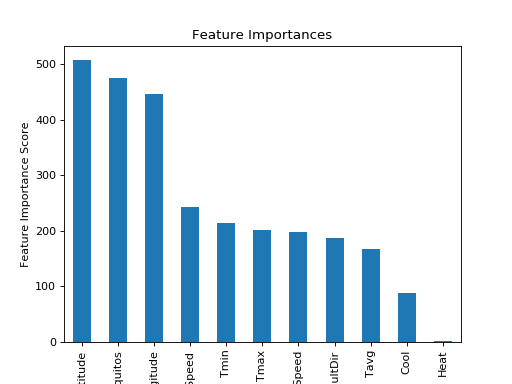

In [246]:
xgb1 = XGBClassifier(
 learning_rate = 0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
clf = modelfit(xgb1, pikachu_train, predictors, 'WnvPresent')
clf

In [83]:
param_test1 = {
'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.2, n_estimators=140,
max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(pikachu_train[predictors],pikachu_train['WnvPresent'])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


([mean: 0.50799, std: 0.17904, params: {'learning_rate': 0.1},
  mean: 0.48843, std: 0.18056, params: {'learning_rate': 0.2},
  mean: 0.50457, std: 0.17866, params: {'learning_rate': 0.3},
  mean: 0.49217, std: 0.17534, params: {'learning_rate': 0.4},
  mean: 0.48821, std: 0.18300, params: {'learning_rate': 0.5},
  mean: 0.48729, std: 0.17146, params: {'learning_rate': 0.6},
  mean: 0.50452, std: 0.16240, params: {'learning_rate': 0.7},
  mean: 0.49554, std: 0.17260, params: {'learning_rate': 0.8},
  mean: 0.46944, std: 0.14838, params: {'learning_rate': 0.9},
  mean: 0.47690, std: 0.17986, params: {'learning_rate': 1.0}],
 {'learning_rate': 0.1},
 0.507985817423286)

In [196]:
model = RandomForestRegressor(100, oob_score = True, n_jobs = 1 , random_state = 200)
model.fit(x, y)
print ("C-stat: " + str(roc_auc_score(y, model.oob_prediction_)))

C-stat: 0.808808877699


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
print("Accuracy Store " + str(clf.score(x,y)))

In [ ]:
cv = cross_val_score(clf, x, y, cv = 10)
print(cv)

In [ ]:
cva = np.array(cv)
mean = np.mean(cva)
std = np.std(cva)
print("Mean: " + str(mean))
print("Standard Deviation: " + str(std))

In [ ]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = cv
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Decision Tree Cross Validation, 10 Fold')
 
plt.show()

In [187]:
#z = x.copy()
#z['WnvPresent'] = y.copy()
#raichu_train = z.convert_objects(convert_numeric=True)

In [188]:
#test = raichu_train.tail(1000)
#test.head(5)

In [189]:
#res = test['WnvPresent']
#test.drop("WnvPresent", axis=1, inplace=True)

In [190]:
#test.head(10)

In [191]:
#ypred = clf.predict(test)
#ypred

In [192]:
#res = res.as_matrix()

In [193]:
#total = 0
#co = 0
#for i in ypred:
   # total += math.pow((ypred[co] - res[co]), 2.0)
   # co += 1
#1 - (total / 1000.0)